# Jonathan Halverson
# Saturday, January 13, 2018
# Word embeddings

In [38]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

To creat word embeddings use the google code word2vec.c located in data_science/deep_learning/word2vec-master. Create a list of words from all the text then produce the word vectors and write them to file in a readable way.

### Load Moby Dick

In [39]:
import nltk
md = list(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))

In [40]:
md[-10:]

[u'after',
 u'her',
 u'missing',
 u'children',
 u',',
 u'only',
 u'found',
 u'another',
 u'orphan',
 u'.']

In [41]:
md = md[md.index('Ishmael') - 2:]

In [42]:
md[-10:]

[u'after',
 u'her',
 u'missing',
 u'children',
 u',',
 u'only',
 u'found',
 u'another',
 u'orphan',
 u'.']

In [43]:
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def tokenize(raw_text):
     # keep only alphabetical characters and split on whitespace
     letters_only = re.sub("[^a-zA-Z]", " ", raw_text)
     words = letters_only.lower().split()
    
     # count the words and filter based on count and stopwords, apply stemming
     count = Counter(words)
     #porter = PorterStemmer()
     #stops = stopwords.words("english")
     #words = [porter.stem(word) for word in words if (word not in stops) and (count[word] > 1) and (len(word) > 1)]
     words = [word for word in words if (count[word] > 0) and (len(word) > 1)]

     return words

In [44]:
words = tokenize(' '.join(md))
len(set(words))

16672

In [45]:
len(words)

205697

In [46]:
with open('text8_moby_dick', 'w') as f:
     f.write(' '.join(words))

In [10]:
words[-10:]

[u'in',
 u'her',
 u'search',
 u'after',
 u'her',
 u'missing',
 u'children',
 u'only',
 u'found',
 u'another']

In [11]:
count = Counter(words)

In [12]:
count.most_common(37)

[(u'the', 14175),
 (u'of', 6469),
 (u'and', 6325),
 (u'to', 4539),
 (u'in', 4077),
 (u'that', 3045),
 (u'it', 2497),
 (u'his', 2495),
 (u'he', 1876),
 (u'but', 1805),
 (u'as', 1720),
 (u'with', 1692),
 (u'is', 1690),
 (u'was', 1627),
 (u'for', 1593),
 (u'all', 1515),
 (u'this', 1382),
 (u'at', 1304),
 (u'by', 1175),
 (u'whale', 1150),
 (u'not', 1142),
 (u'from', 1072),
 (u'him', 1058),
 (u'so', 1053),
 (u'on', 1040),
 (u'be', 1032),
 (u'one', 907),
 (u'you', 884),
 (u'there', 854),
 (u'now', 779),
 (u'had', 767),
 (u'have', 754),
 (u'or', 689),
 (u'were', 677),
 (u'they', 649),
 (u'like', 639),
 (u'me', 630)]

### Aside on Zipf's law applied to Moby Dick

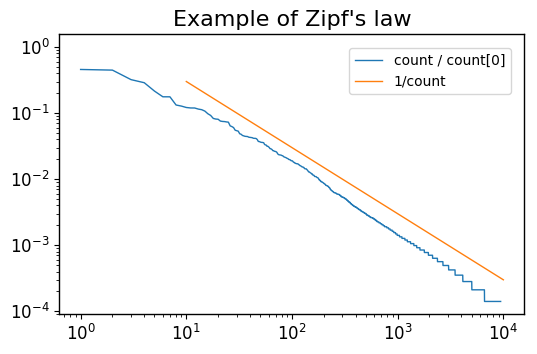

In [13]:
_, cts = zip(*count.most_common())
plt.loglog(np.array(cts, np.float) / cts[0], label='count / count[0]')
plt.loglog(np.logspace(1, 4), 3.0 / np.logspace(1, 4), label='1/count')
plt.title('Example of Zipf\'s law')
plt.legend()

In [14]:
dictionary = dict()
for word, _ in count.most_common(): # loop over all words in vocabulary
     dictionary[word] = len(dictionary) # each word is assigned a unique id

In [15]:
# form running list of id's
data = list()
for word in words:
     index = dictionary[word]
     data.append(index)

In [16]:
inverted_dict = dict(zip(dictionary.values(), dictionary.keys()))

In [17]:
print('Sample data', data[:10], [inverted_dict[i] for i in data[:10]])

('Sample data', [397, 36, 1007, 40, 241, 600, 134, 283, 105, 77], [u'call', u'me', u'ishmael', u'some', u'years', u'ago', u'never', u'mind', u'how', u'long'])


The word 'me' is the 37-th most common.